

# Problem Set 6
### Due by 5PM Thursday 30 May, submitted online via Canvas.

## Instructions (please read everything carefully)

* The questions are given in the cells, below. Your answers should be in this same notebook, beneath each question (insert as many cells as you need), with
  - text in markdown cells. Equations should be in $\LaTeX$
  - fully functional code, with comments so we can understand what you are doing. If you based any part of your code on someone else's initial implementation, cite appropriately.
  - outputs, in presentable format.
    - Plots should have clear titles, axis labels, and legends if needed.
    - Numerical answers should have a sensible number of digits with surrounding text that identifies what is being printed.

* Submit your notebook to Canvas for the specific assignment prior to the deadline. Please use a file name that includes your name and the problem set number, *e.g.*, pset6-Ritz.ipynb.

* Solutions will be posted soon after the deadline, and your work will be graded within one week (usually sooner).

* Problems are typically posted one week in advance. You are encouraged to work together on problems, but the actual code and the full notebook must be your own work.

* The time it takes to write code is often unpredictable, particularly at the beginning of the quarter. Start early.

* If anything is unclear, please ask! The Discussion Forum on Canvas is a convenient method that gives everyone the benefit of your question and the answer(s). Your TA, Ben Lehmann, also provides numerous help sessions throughout the week.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import scipy.integrate as integrate
% matplotlib inline

## Problem 1

This problem involves using the time-independent Schrödinger equation solver we developed in class (*Lectures12.ipynb*), and also see Chapter 9 of the textbook. You can copy the final code from class here and adapt it as needed, or you can rewrite any or all of it as you like. (Be careful: don't take the code listing from the book -- use the rewrite provided in the notebook toward the bottom.)

a) Explore the finite square well. Specifically, for the well parameters in the class notes, find the three lowest-energy states (**both the eigenvalue and plot the corresponding wave functions**). 

*Hint: first have a look at the diff function value, whose zeros we are seeking, as a function of energy. There's a straightforward way to find a small energy range that contains a single allowed energy solution, as we discussed in class. A plot could be useful. Once you have that range, set Emax and Emin for the bisection algorithm.*


There is one zero between -15.70 and -15.50. Let's proceed.

Diffmax and Diffmin: -1.8536407907327832 1.0318898221239785
Count: 0   Energy: -15.60000    Diff -13.25 
Count: 1   Energy: -15.55000    Diff 3.20 
Count: 2   Energy: -15.57500    Diff 10.27 
Count: 3   Energy: -15.58750    Diff 151.46 
Count: 4   Energy: -15.59375    Diff -28.24 
Count: 5   Energy: -15.59062    Diff -68.19 
Count: 6   Energy: -15.58906    Diff -244.04 
Count: 7   Energy: -15.58828    Diff 809.43 
Count: 8   Energy: -15.58867    Diff -696.80 
Count: 9   Energy: -15.58848    Diff -9924.42 
Count: 10   Energy: -15.58838    Diff 1763.24 
Count: 11   Energy: -15.58843    Diff 4294.84 
Count: 12   Energy: -15.58845    Diff 15086.57 

 Final eigenvalue E = -15.58846 
iterations =  13


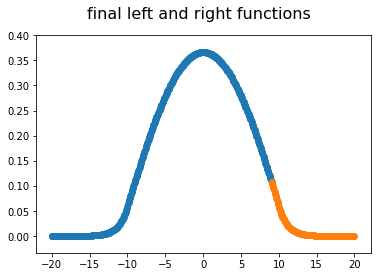

There is one zero between -14.40 and -14.30. Let's proceed.

Diffmax and Diffmin: -11.844943894356858 8.03980273944968
Count: 0   Energy: -14.35000    Diff 57.29 
Count: 1   Energy: -14.37500    Diff -29.38 
Count: 2   Energy: -14.36250    Diff -118.52 
Count: 3   Energy: -14.35625    Diff 223.70 
Count: 4   Energy: -14.35938    Diff -501.80 
Count: 5   Energy: -14.35781    Diff 809.26 
Count: 6   Energy: -14.35859    Diff -2635.61 
Count: 7   Energy: -14.35820    Diff 2338.55 
Count: 8   Energy: -14.35840    Diff 40237.55 
Count: 9   Energy: -14.35850    Diff -5634.53 
Count: 10   Energy: -14.35845    Diff -13145.30 
Count: 11   Energy: -14.35842    Diff -39572.38 

 Final eigenvalue E = -14.35841 
iterations =  12


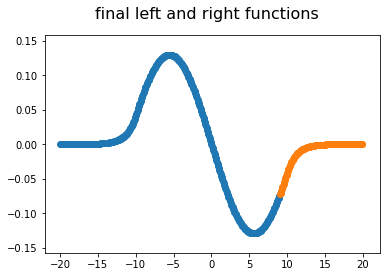

There is one zero between -13.30 and -12.00. Let's proceed.

Diffmax and Diffmin: -0.2484813253382163 2.4843046500260697
Count: 0   Energy: -12.65000    Diff -2.00 
Count: 1   Energy: -12.32500    Diff 5596.42 
Count: 2   Energy: -12.48750    Diff -4.35 
Count: 3   Energy: -12.40625    Diff -9.00 
Count: 4   Energy: -12.36562    Diff -18.29 
Count: 5   Energy: -12.34531    Diff -36.95 
Count: 6   Energy: -12.33516    Diff -74.64 
Count: 7   Energy: -12.33008    Diff -151.54 
Count: 8   Energy: -12.32754    Diff -311.77 
Count: 9   Energy: -12.32627    Diff -660.27 
Count: 10   Energy: -12.32563    Diff -1496.92 
Count: 11   Energy: -12.32532    Diff -4130.32 
Count: 12   Energy: -12.32516    Diff -30395.65 
Count: 13   Energy: -12.32508    Diff 13910.81 
Count: 14   Energy: -12.32512    Diff 50108.00 
Count: 15   Energy: -12.32514    Diff -161648.18 

 Final eigenvalue E = -12.32513 
iterations =  16


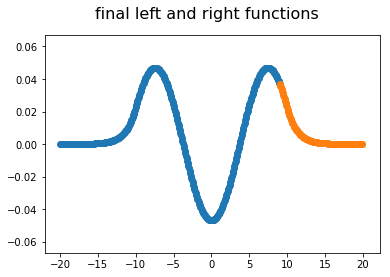

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
############## Schrod and V definition. Psi is vectorized as (psi,psi') ##########
def f(y, x, k2fac,E):
    return [y[1],-k2fac*(E-V(x))*y[0]]

def V(x):
    if (abs(x) < 10.):  return (-16.0) # Depth of well
    else:               return (0.)
########## boundary condition match error ###############        
def diff(E, k2fac, xs, imatch, icount, Lwf, Rwf):
    # start on the left.
    Lwf[icount,0,0] = 1.e-5                                      
    Lwf[icount,0,1]= Lwf[icount,0,0]*np.sqrt(k2fac*abs(E))
    state = ([Lwf[icount,0,0], Lwf[icount,0,1]])
    Lwf[icount,:,:] = integrate.odeint(f, state, xs[0:len(Lwf[0,:,0])], args=(k2fac,E))
    # and now the right. odeint doesn't integrate backwards
    # apparently so flip by hand!:
    yb=np.zeros((2,len(Rwf[0,:,0])))
    yb[0,0] = 1.e-5                                      
    yb[0,1]=  yb[0,0]*np.sqrt(k2fac*abs(E)) # no minus sign for the slope,
                                            # as it's already going backward
    state = ([yb[0,0],yb[0,1]])
    xb=-xs[:(len(Lwf[0,:,0])-2):-1]
    yb = integrate.odeint(f, state,xb, args=(k2fac,E)) # step backward to imatch
    Rwf[icount,:,:]=yb[::-1]
    # get the relative normalization right. In effect, the search is
    # really just matching curvatures.
    norma=Lwf[icount,-1,0]/Rwf[icount,0,0]
    Rwf[icount,:,:]=norma*Rwf[icount,:,:]
    # calculate logarithmic derivative
    left = Lwf[icount,-1,1]/Lwf[icount,-1,0]        
    right = Rwf[icount,0,1]/Rwf[icount,0,0]                     
    ldif=(left - right)/(left + right)
    # print("left and right:",left,right)
    return ldif, Lwf[icount,:,:], Rwf[icount,:,:]

### parameters  ############
count_max = 100  # maximun number of search iterations
eps       = 1e-6 # Precision
n_steps   = 501  # number of (spatial) integration steps
xmax=20.         # set the size of the full +/- x range 
xmatch = 9.      # the x value at which the left and right sides should match
# guess search range
Eguesses = [(-15.5, -15.7), (-14.3, -14.4), (-12.0, -13.3)]
k2fac=0.04829
for i, minmax in enumerate(Eguesses):
    Emin = minmax[0]
    Emax = minmax[1]
    ############
    h=2.*xmax/(n_steps-1)
    xs=np.arange(-xmax,xmax,h)
    imatch=np.nonzero((xs>xmatch))[0][0]
    # arrays for the left and right wf(index 0) and wf'(index 1)
    Lwf = np.zeros((count_max,imatch+1,2))
    # we need these to overlap at one point, so add 1 more Lwf. 
    Rwf = np.zeros((count_max,n_steps-imatch-1,2))
    icount=0
    Diffmax, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emax, k2fac, xs, imatch,
                                                     icount, Lwf, Rwf)
    Diffmin, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emin, k2fac, xs, imatch,
                                                     icount, Lwf, Rwf)
    if ((Diffmax*Diffmin)>0) : 
        print("\n\n\n WHOOOOPS looks as if there is not one zero in this range\n\n\n",
                Diffmax, Diffmin)
        sys.exit()
    print("There is one zero between %.2f and %.2f. Let's proceed.\n"%(Emax,Emin))
    print("Diffmax and Diffmin:",Diffmax,Diffmin)
    for icount in range(0,count_max+1):
        # Iteration loop
        E = (Emax + Emin)/2.                                 # Divide E range
        Diffmax, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emax, k2fac, xs, imatch,
                                                         icount, Lwf, Rwf)
        Diff, Lwf[icount,:,:], Rwf[icount,:,:] = diff(E, k2fac, xs, imatch, icount,
                                                      Lwf, Rwf) 
        if (Diffmax*Diff > 0):  Emax = E  # Bisection algorithm
        else:                   Emin = E     
        if (abs((Emax-Emin)/E)  <  eps ): break
        print("Count: %d   Energy: %.5f    Diff %.2f "%(icount, E, Diff))
    
    print("\n Final eigenvalue E = %.5f "%E)
    print("iterations = ",icount)
    
    # let's plot the final wave functions
    fig = plt.figure()
    fig.suptitle('final left and right functions', fontsize=16)
    plt.scatter(xs[0:imatch+1],(Lwf[icount-1,:,0]))
    plt.scatter(xs[imatch:],(Rwf[icount-1,:,0]))
    plt.savefig("plt"+str(i)+".png")
    plt.show()

b) Now modify the code to study the simple harmonic oscillator, with the following parameters and conditions:
* Let $V(x)=\frac{1}{2}x^2$. In other words, the spring constant, $k=1$. Don't confuse this $k$ with the $\kappa$ wave vector.

* Let $\hbar=1$ and $\frac{\hbar^2}{2m}=1$ (in other words, $m=\frac{1}{2}$ in these units).
  * Therefore, what is $\omega=\sqrt{k/m}$ for this oscillator? You don't need to implement $\omega$ in the code explicitly, but its value will help you understand and check the results (see below). 
  * Examine the code carefully to make sure you implemented all the updated constants correctly.

* Set *xmax=10* (so solutions will be found in the range $x=(-10,10)$).

As you did in part (a), **find the three lowest-energy states (both eigenvalues and plot the corresponding wave functions, so you know you found the right ones)**.

* Hint: you might have to adjust the end-point values of the wave function and the *xmatch* parameter to get a good result. This isn't too surprising: search methods sometimes need some help.

* Given that you know the QM simple harmonic oscillator has allowed energies $E=(n+\frac{1}{2})\hbar\omega$, you know what energy eigenvalues to expect. **Compare your numerical solutions with your expectation**. The results are surpsingly good. 
 

There is one zero between 1.00 and 0.00. Let's proceed.

Diffmax and Diffmin: 0.12433115863161151 -0.022718345760140358
Count: 0   Energy: 0.50000    Diff -0.11 
Count: 1   Energy: 0.75000    Diff 0.65 
Count: 2   Energy: 0.62500    Diff -0.30 
Count: 3   Energy: 0.68750    Diff -1.34 
Count: 4   Energy: 0.71875    Diff 2.33 
Count: 5   Energy: 0.70312    Diff -6.71 
Count: 6   Energy: 0.71094    Diff 7.02 
Count: 7   Energy: 0.70703    Diff -354.83 
Count: 8   Energy: 0.70898    Diff 14.30 
Count: 9   Energy: 0.70801    Diff 29.78 
Count: 10   Energy: 0.70752    Diff 64.97 
Count: 11   Energy: 0.70728    Diff 159.03 
Count: 12   Energy: 0.70715    Diff 576.21 
Count: 13   Energy: 0.70709    Diff -1847.48 
Count: 14   Energy: 0.70712    Diff 1674.68 
Count: 15   Energy: 0.70711    Diff 35798.21 
Count: 16   Energy: 0.70710    Diff -3896.06 
Count: 17   Energy: 0.70710    Diff -8743.76 
Count: 18   Energy: 0.70711    Diff -23139.41 
Count: 19   Energy: 0.70711    Diff -130873.73 

 Fina

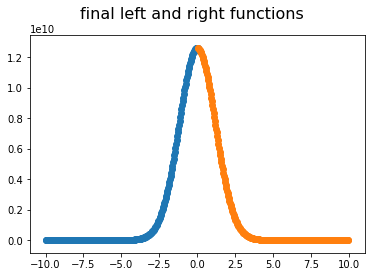

There is one zero between 2.30 and 1.00. Let's proceed.

Diffmax and Diffmin: -0.31891857599181067 0.12433115863161151
Count: 0   Energy: 1.65000    Diff 0.12 
Count: 1   Energy: 1.97500    Diff 0.36 
Count: 2   Energy: 2.13750    Diff -3.32 
Count: 3   Energy: 2.05625    Diff 0.81 
Count: 4   Energy: 2.09687    Diff 2.18 
Count: 5   Energy: 2.11719    Diff 12.95 
Count: 6   Energy: 2.12734    Diff -8.90 
Count: 7   Energy: 2.12227    Diff -56.67 
Count: 8   Energy: 2.11973    Diff 33.59 
Count: 9   Energy: 2.12100    Diff 165.15 
Count: 10   Energy: 2.12163    Diff -172.48 
Count: 11   Energy: 2.12131    Diff 7804.90 
Count: 12   Energy: 2.12147    Diff -352.73 
Count: 13   Energy: 2.12139    Diff -738.84 
Count: 14   Energy: 2.12135    Diff -1632.18 
Count: 15   Energy: 2.12133    Diff -4127.50 
Count: 16   Energy: 2.12132    Diff -17520.28 
Count: 17   Energy: 2.12132    Diff 28150.09 
Count: 18   Energy: 2.12132    Diff -92794.94 

 Final eigenvalue E = 2.12132 
iterations =  19


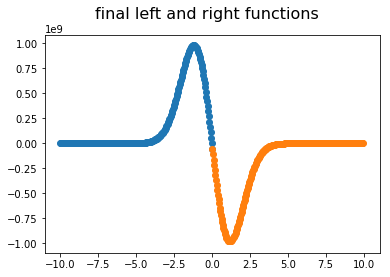

There is one zero between 4.36 and 3.00. Let's proceed.

Diffmax and Diffmin: 0.17235918641276093 -0.14811136714904696
Count: 0   Energy: 3.68000    Diff 0.48 
Count: 1   Energy: 3.34000    Diff -0.34 
Count: 2   Energy: 3.51000    Diff -2.61 
Count: 3   Energy: 3.59500    Diff 1.14 
Count: 4   Energy: 3.55250    Diff 3.95 
Count: 5   Energy: 3.53125    Diff -15.59 
Count: 6   Energy: 3.54188    Diff 10.55 
Count: 7   Energy: 3.53656    Diff 64.99 
Count: 8   Energy: 3.53391    Diff -41.05 
Count: 9   Energy: 3.53523    Diff -223.14 
Count: 10   Energy: 3.53590    Diff 183.37 
Count: 11   Energy: 3.53557    Diff 2056.16 
Count: 12   Energy: 3.53540    Diff -500.60 
Count: 13   Energy: 3.53548    Diff -1323.42 
Count: 14   Energy: 3.53552    Diff -7427.45 
Count: 15   Energy: 3.53555    Diff 5686.51 
Count: 16   Energy: 3.53554    Diff 48520.47 
Count: 17   Energy: 3.53553    Diff -17539.90 

 Final eigenvalue E = 3.53553 
iterations =  18


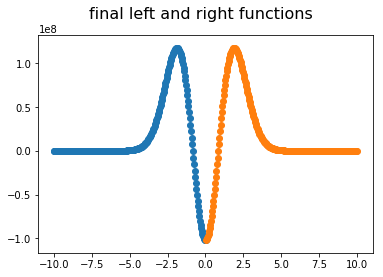

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
############## Schrod and V definition. Psi is vectorized as (psi,psi') ##########
def f(y, x, k2fac,E):
    return [y[1],-k2fac*(E-V(x))*y[0]]

def V(x):
    return 0.5*x**2
########## boundary condition match error ###############        
def diff(E, k2fac, xs, imatch, icount, Lwf, Rwf):
    # start on the left.
    Lwf[icount,0,0] = 1.e-5                                      
    Lwf[icount,0,1]= Lwf[icount,0,0]*np.sqrt(k2fac*abs(E))
    state = ([Lwf[icount,0,0], Lwf[icount,0,1]])
    Lwf[icount,:,:] = integrate.odeint(f, state, xs[0:len(Lwf[0,:,0])], args=(k2fac,E))
    # and now the right. odeint doesn't integrate backwards
    # apparently so flip by hand!:
    yb=np.zeros((2,len(Rwf[0,:,0])))
    yb[0,0] = 1.e-5                                      
    yb[0,1]=  yb[0,0]*np.sqrt(k2fac*abs(E)) # no minus sign for the slope,
                                            # as it's already going backward
    state = ([yb[0,0],yb[0,1]])
    xb=-xs[:(len(Lwf[0,:,0])-2):-1]
    yb = integrate.odeint(f, state,xb, args=(k2fac,E)) # step backward to imatch
    Rwf[icount,:,:]=yb[::-1]
    # get the relative normalization right. In effect, the search is
    # really just matching curvatures.
    norma=Lwf[icount,-1,0]/Rwf[icount,0,0]
    Rwf[icount,:,:]=norma*Rwf[icount,:,:]
    # calculate logarithmic derivative
    left = Lwf[icount,-1,1]/Lwf[icount,-1,0]        
    right = Rwf[icount,0,1]/Rwf[icount,0,0]                     
    ldif=(left - right)/(left + right)
    # print("left and right:",left,right)
    return ldif, Lwf[icount,:,:], Rwf[icount,:,:]

### parameters  ############
count_max = 100  # maximun number of search iterations
eps       = 1e-6 # Precision
n_steps   = 501  # number of (spatial) integration steps
xmax=10.         # set the size of the full +/- x range 
xmatch = 0.      # the x value at which the left and right sides should match
# guess search range
Eguesses = [(0, 1), (1, 2.3), (3, 4.36)]
k2fac= 1
for i, minmax in enumerate(Eguesses):
    Emin = minmax[0]
    Emax = minmax[1]
    ############
    h=2.*xmax/(n_steps-1)
    xs=np.arange(-xmax,xmax,h)
    imatch=np.nonzero((xs>xmatch))[0][0]
    # arrays for the left and right wf(index 0) and wf'(index 1)
    Lwf = np.zeros((count_max,imatch+1,2))
    # we need these to overlap at one point, so add 1 more Lwf. 
    Rwf = np.zeros((count_max,n_steps-imatch-1,2))
    icount=0
    Diffmax, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emax, k2fac, xs, imatch,
                                                     icount, Lwf, Rwf)
    Diffmin, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emin, k2fac, xs, imatch,
                                                     icount, Lwf, Rwf)
    if ((Diffmax*Diffmin)>0) : 
        print("\n\n\n WHOOOOPS looks as if there is not one zero in this range\n\n\n",
                Diffmax, Diffmin)
        #sys.exit()
    print("There is one zero between %.2f and %.2f. Let's proceed.\n"%(Emax,Emin))
    print("Diffmax and Diffmin:",Diffmax,Diffmin)
    for icount in range(0,count_max+1):
        # Iteration loop
        E = (Emax + Emin)/2.                                 # Divide E range
        Diffmax, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emax, k2fac, xs, imatch,
                                                         icount, Lwf, Rwf)
        Diff, Lwf[icount,:,:], Rwf[icount,:,:] = diff(E, k2fac, xs, imatch, icount,
                                                      Lwf, Rwf) 
        if (Diffmax*Diff > 0):  Emax = E  # Bisection algorithm
        else:                   Emin = E     
        if E != 0:
            if (abs((Emax-Emin)/E)  <  eps ): break
        print("Count: %d   Energy: %.5f    Diff %.2f "%(icount, E, Diff))
    
    print("\n Final eigenvalue E = %.5f "%E)
    print("iterations = ",icount)
    
    # let's plot the final wave functions
    fig = plt.figure()
    fig.suptitle('final left and right functions', fontsize=16)
    plt.scatter(xs[0:imatch+1],(Lwf[icount-1,:,0]))
    plt.scatter(xs[imatch:],(Rwf[icount-1,:,0]))
    plt.savefig("plt"+str(i)+".png")
    plt.show()

c) Now find the $n=50$ and $n=51$ eigenvalues and plot the associated wave functions. Again, you might need to adjust *xmatch* and the end-point wave function values to get a robust result. 
* Once you get it, the result is very satisfying: not a Hermite polynomial or ladder-operator recursion relation in sight! 

There is one zero between 71.80 and 71.70. Let's proceed.

Diffmax and Diffmin: 5.513533795745708 -144.99616177916977
Count: 0   Energy: 71.75000    Diff 11.93 
Count: 1   Energy: 71.72500    Diff 23.74 
Count: 2   Energy: 71.71250    Diff 51.60 
Count: 3   Energy: 71.70625    Diff 149.93 
Count: 4   Energy: 71.70312    Diff 7066.66 
Count: 5   Energy: 71.70156    Diff -292.75 
Count: 6   Energy: 71.70234    Diff -958.14 
Count: 7   Energy: 71.70273    Diff -984.54 
Count: 8   Energy: 71.70293    Diff -8304.05 
Count: 9   Energy: 71.70303    Diff -3287.73 

 Final eigenvalue E = 71.70308 
iterations =  10


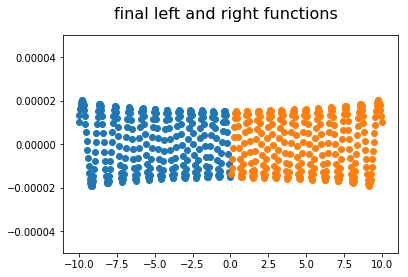

There is one zero between 73.99 and 73.83. Let's proceed.

Diffmax and Diffmin: -22.95977821483347 4.318046180830285
Count: 0   Energy: 73.91050    Diff 10.87 
Count: 1   Energy: 73.95025    Diff 40.08 
Count: 2   Energy: 73.97012    Diff -77.16 
Count: 3   Energy: 73.96019    Diff 176.60 
Count: 4   Energy: 73.96516    Diff -372.03 
Count: 5   Energy: 73.96267    Diff 1180.69 
Count: 6   Energy: 73.96391    Diff -1663.61 
Count: 7   Energy: 73.96329    Diff 1620.19 
Count: 8   Energy: 73.96360    Diff 14647.06 
Count: 9   Energy: 73.96376    Diff -4838.66 
Count: 10   Energy: 73.96368    Diff -14455.23 

 Final eigenvalue E = 73.96364 
iterations =  11


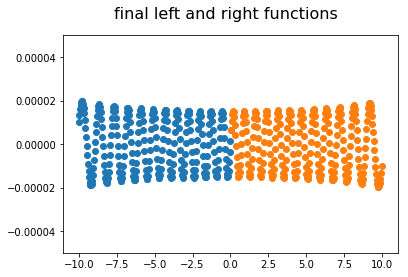

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
############## Schrod and V definition. Psi is vectorized as (psi,psi') ##########
def f(y, x, k2fac,E):
    return [y[1],-k2fac*(E-V(x))*y[0]]

def V(x):
    return 0.5*x**2
########## boundary condition match error ###############        
def diff(E, k2fac, xs, imatch, icount, Lwf, Rwf):
    # start on the left.
    Lwf[icount,0,0] = 1.e-5                                      
    Lwf[icount,0,1]= Lwf[icount,0,0]*np.sqrt(k2fac*abs(E))
    state = ([Lwf[icount,0,0], Lwf[icount,0,1]])
    Lwf[icount,:,:] = integrate.odeint(f, state, xs[0:len(Lwf[0,:,0])], args=(k2fac,E))
    # and now the right. odeint doesn't integrate backwards
    # apparently so flip by hand!:
    yb=np.zeros((2,len(Rwf[0,:,0])))
    yb[0,0] = 1.e-5                                      
    yb[0,1]=  yb[0,0]*np.sqrt(k2fac*abs(E)) # no minus sign for the slope,
                                            # as it's already going backward
    state = ([yb[0,0],yb[0,1]])
    xb=-xs[:(len(Lwf[0,:,0])-2):-1]
    yb = integrate.odeint(f, state,xb, args=(k2fac,E)) # step backward to imatch
    Rwf[icount,:,:]=yb[::-1]
    # get the relative normalization right. In effect, the search is
    # really just matching curvatures.
    norma=Lwf[icount,-1,0]/Rwf[icount,0,0]
    Rwf[icount,:,:]=norma*Rwf[icount,:,:]
    # calculate logarithmic derivative
    left = Lwf[icount,-1,1]/Lwf[icount,-1,0]        
    right = Rwf[icount,0,1]/Rwf[icount,0,0]                     
    ldif=(left - right)/(left + right)
    # print("left and right:",left,right)
    return ldif, Lwf[icount,:,:], Rwf[icount,:,:]

# Parameters
# --------------------------------------------------------------------------
count_max = 1000 # maximun number of search iterations
eps       = 1e-6 # Precision
n_steps   = 501  # number of (spatial) integration steps
xmax      = 10.  # set the size of the full +/- x range 
xmatch    = 0    # the x value at which the left and right sides should match
# guess search range
Eguesses = [(71.7, 71.8), (73.831, 73.99)]
k2fac= 1
for i, minmax in enumerate(Eguesses):
    Emin = minmax[0]
    Emax = minmax[1]
    ############
    h=2.*xmax/(n_steps-1)
    xs=np.arange(-xmax,xmax,h)
    imatch=np.nonzero((xs>xmatch))[0][0]
    # arrays for the left and right wf(index 0) and wf'(index 1)
    Lwf = np.zeros((count_max,imatch+1,2))
    # we need these to overlap at one point, so add 1 more Lwf. 
    Rwf = np.zeros((count_max,n_steps-imatch-1,2))
    icount=0
    Diffmax, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emax, k2fac, xs, imatch,
                                                     icount, Lwf, Rwf)
    Diffmin, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emin, k2fac, xs, imatch,
                                                     icount, Lwf, Rwf)
    if ((Diffmax*Diffmin)>0) : 
        print("\n\n\n WHOOOOPS looks as if there is not one zero in this range\n\n\n",
                Diffmax, Diffmin)
        #sys.exit()
    print("There is one zero between %.2f and %.2f. Let's proceed.\n"%(Emax,Emin))
    print("Diffmax and Diffmin:",Diffmax,Diffmin)
    for icount in range(0,count_max+1):
        # Iteration loop
        E = (Emax + Emin)/2.                                 # Divide E range
        Diffmax, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emax, k2fac, xs, imatch,
                                                         icount, Lwf, Rwf)
        Diff, Lwf[icount,:,:], Rwf[icount,:,:] = diff(E, k2fac, xs, imatch, icount,
                                                      Lwf, Rwf) 
        if (Diffmax*Diff > 0):  Emax = E  # Bisection algorithm
        else:                   Emin = E     
        if E != 0:
            if (abs((Emax-Emin)/E)  <  eps ): break
        print("Count: %d   Energy: %.5f    Diff %.2f "%(icount, E, Diff))
    
    print("\n Final eigenvalue E = %.5f "%E)
    print("iterations = ",icount)
    
    # let's plot the final wave functions
    fig = plt.figure()
    fig.suptitle('final left and right functions', fontsize=16)
    plt.scatter(xs[0:imatch+1],(Lwf[icount-1,:,0]))
    plt.scatter(xs[imatch:],(Rwf[icount-1,:,0]))
    plt.ylim(-0.00005, 0.00005)
    plt.savefig("plt"+str(i)+".png")
    plt.show()

d) BONUS PROBLEM (not required, and please only attempt this after you have completed everything above).

Investigate the solutions for the potential

$$V(x)=\lambda x^4 - \mu^2 x^2$$

where $\lambda=0.021$ and $\mu^2=1.5$.

* First, plot the function. This is a one-dimensional variant of the Higgs potential.
* Next, set *xmatch=0.1, and find the lowest-energy state and energy eigenvalue. There's an interesting twist here: you probably found the lowest-energy wave function that is symmetric about $x=0$. There are actually lower-energy states with the particle primarily localized in either the left or right wells, where the energy is negative. If you are brave, adjust *xmatch* to try to find some of those lower-energy eigenvalues and plot the accompanying wave function.


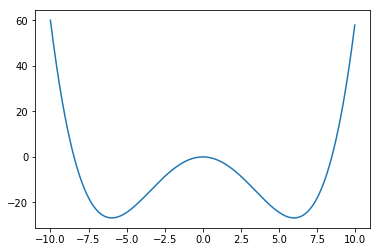

There is one zero between -1.50 and 0.00. Let's proceed.

Diffmax and Diffmin: 0.27249921312065195 -0.03232583457760362
Count: 0   Energy: -0.75000    Diff -0.03 
Count: 1   Energy: -1.12500    Diff -0.07 
Count: 2   Energy: -1.31250    Diff -0.15 
Count: 3   Energy: -1.40625    Diff -0.31 
Count: 4   Energy: -1.45312    Diff -0.98 
Count: 5   Energy: -1.47656    Diff 2.08 
Count: 6   Energy: -1.46484    Diff -2.92 
Count: 7   Energy: -1.47070    Diff 22.70 
Count: 8   Energy: -1.46777    Diff -6.48 
Count: 9   Energy: -1.46924    Diff -17.69 
Count: 10   Energy: -1.46997    Diff -151.22 
Count: 11   Energy: -1.47034    Diff 53.55 
Count: 12   Energy: -1.47015    Diff 166.47 
Count: 13   Energy: -1.47006    Diff -3351.13 
Count: 14   Energy: -1.47011    Diff 351.52 
Count: 15   Energy: -1.47009    Diff 767.48 
Count: 16   Energy: -1.47007    Diff 1999.93 
Count: 17   Energy: -1.47007    Diff 10865.23 
Count: 18   Energy: -1.47007    Diff -11427.98 

 Final eigenvalue E = -1.47007 
iter

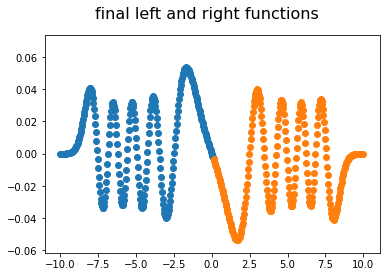

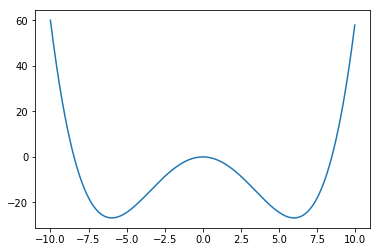

There is one zero between -100.00 and 0.00. Let's proceed.

Diffmax and Diffmin: 8.998872080753274e-05 -0.03232583457760362
Count: 0   Energy: -50.00000    Diff 0.00 
Count: 1   Energy: -25.00000    Diff 0.00 
Count: 2   Energy: -12.50000    Diff 0.00 
Count: 3   Energy: -6.25000    Diff 0.01 
Count: 4   Energy: -3.12500    Diff 0.01 
Count: 5   Energy: -1.56250    Diff -3.64 
Count: 6   Energy: -2.34375    Diff 0.03 
Count: 7   Energy: -1.95312    Diff 0.07 
Count: 8   Energy: -1.75781    Diff 0.13 
Count: 9   Energy: -1.66016    Diff 0.23 
Count: 10   Energy: -1.61133    Diff 0.42 
Count: 11   Energy: -1.58691    Diff 0.82 
Count: 12   Energy: -1.57471    Diff 1.83 
Count: 13   Energy: -1.56860    Diff 6.22 
Count: 14   Energy: -1.56555    Diff -20.13 
Count: 15   Energy: -1.56708    Diff 17.46 
Count: 16   Energy: -1.56631    Diff 236.15 
Count: 17   Energy: -1.56593    Diff -44.17 
Count: 18   Energy: -1.56612    Diff -108.66 
Count: 19   Energy: -1.56622    Diff -407.93 
Count: 20

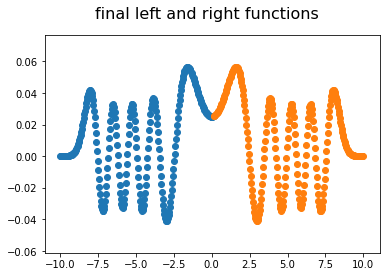

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation
############## Schrod and V definition. Psi is vectorized as (psi,psi') ##########
def f(y, x, k2fac,E):
    return [y[1],-k2fac*(E-V(x))*y[0]]

def V(x):
    return 0.021*x**4-1.5*x**2
########## boundary condition match error ###############        
def diff(E, k2fac, xs, imatch, icount, Lwf, Rwf):
    # start on the left.
    Lwf[icount,0,0] = 1.e-5                                      
    Lwf[icount,0,1]= Lwf[icount,0,0]*np.sqrt(k2fac*abs(E))
    state = ([Lwf[icount,0,0], Lwf[icount,0,1]])
    Lwf[icount,:,:] = integrate.odeint(f, state, xs[0:len(Lwf[0,:,0])], args=(k2fac,E))
    # and now the right. odeint doesn't integrate backwards
    # apparently so flip by hand!:
    yb=np.zeros((2,len(Rwf[0,:,0])))
    yb[0,0] = 1.e-5                                      
    yb[0,1]=  yb[0,0]*np.sqrt(k2fac*abs(E)) # no minus sign for the slope,
                                            # as it's already going backward
    state = ([yb[0,0],yb[0,1]])
    xb=-xs[:(len(Lwf[0,:,0])-2):-1]
    yb = integrate.odeint(f, state,xb, args=(k2fac,E)) # step backward to imatch
    Rwf[icount,:,:]=yb[::-1]
    # get the relative normalization right. In effect, the search is
    # really just matching curvatures.
    norma=Lwf[icount,-1,0]/Rwf[icount,0,0]
    Rwf[icount,:,:]=norma*Rwf[icount,:,:]
    # calculate logarithmic derivative
    left = Lwf[icount,-1,1]/Lwf[icount,-1,0]        
    right = Rwf[icount,0,1]/Rwf[icount,0,0]                     
    ldif=(left - right)/(left + right)
    # print("left and right:",left,right)
    return ldif, Lwf[icount,:,:], Rwf[icount,:,:]

# Parameters
# --------------------------------------------------------------------------
count_max = 1000 # maximun number of search iterations
eps       = 1e-6 # Precision
n_steps   = 501  # number of (spatial) integration steps
xmax      = 10.  # set the size of the full +/- x range 
xmatch    = 0.1  # the x value at which the left and right sides should match
# guess search range
Eguesses = [(0, -1.5), (0, -100)]
k2fac= 1
for i, minmax in enumerate(Eguesses):
    Emin = minmax[0]
    Emax = minmax[1]
    ############
    h=2.*xmax/(n_steps-1)
    xs=np.arange(-xmax,xmax,h)
    # Quick potential plot
    plt.figure()
    plt.plot(xs, V(xs))
    plt.savefig("potential.png")
    plt.show()
    plt.close()
    imatch=np.nonzero((xs>xmatch))[0][0]
    # arrays for the left and right wf(index 0) and wf'(index 1)
    Lwf = np.zeros((count_max,imatch+1,2))
    # we need these to overlap at one point, so add 1 more Lwf. 
    Rwf = np.zeros((count_max,n_steps-imatch-1,2))
    icount=0
    Diffmax, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emax, k2fac, xs, imatch,
                                                     icount, Lwf, Rwf)
    Diffmin, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emin, k2fac, xs, imatch,
                                                     icount, Lwf, Rwf)
    if ((Diffmax*Diffmin)>0) : 
        print("\n\n\n WHOOOOPS looks as if there is not one zero in this range\n\n\n",
                Diffmax, Diffmin)
        #sys.exit()
    print("There is one zero between %.2f and %.2f. Let's proceed.\n"%(Emax,Emin))
    print("Diffmax and Diffmin:",Diffmax,Diffmin)
    for icount in range(0,count_max+1):
        # Iteration loop
        E = (Emax + Emin)/2.                                 # Divide E range
        Diffmax, Lwf[icount,:,:], Rwf[icount,:,:] = diff(Emax, k2fac, xs, imatch,
                                                         icount, Lwf, Rwf)
        Diff, Lwf[icount,:,:], Rwf[icount,:,:] = diff(E, k2fac, xs, imatch, icount,
                                                      Lwf, Rwf) 
        if (Diffmax*Diff > 0):  Emax = E  # Bisection algorithm
        else:                   Emin = E     
        if E != 0:
            if (abs((Emax-Emin)/E)  <  eps ): break
        print("Count: %d   Energy: %.5f    Diff %.2f "%(icount, E, Diff))
    
    print("\n Final eigenvalue E = %.5f "%E)
    print("iterations = ",icount)
    
    # let's plot the final wave functions
    fig = plt.figure()
    fig.suptitle('final left and right functions', fontsize=16)
    plt.scatter(xs[0:imatch+1],(Lwf[icount-1,:,0]))
    plt.scatter(xs[imatch:],(Rwf[icount-1,:,0]))
    plt.savefig("plt"+str(i)+".png")